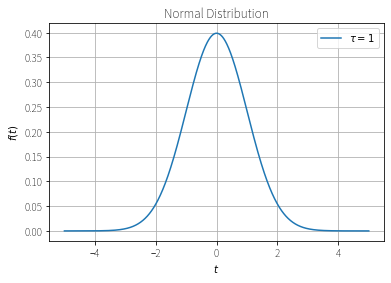

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(t)
def normal_distribution(t, tau):
    return (1 / (tau * np.sqrt(2 * np.pi))) * np.exp(-t**2 / (2 * tau**2))

# Set the parameter tau
tau = 1

# Create a range of t values
t_values = np.linspace(-5, 5, 1000)

# Compute f(t)
f_t = normal_distribution(t_values, tau)

# Plot the normal distribution
plt.plot(t_values, f_t, label=f'$\\tau={tau}$')
plt.title('Normal Distribution')
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.legend()
plt.grid(True)
plt.show()

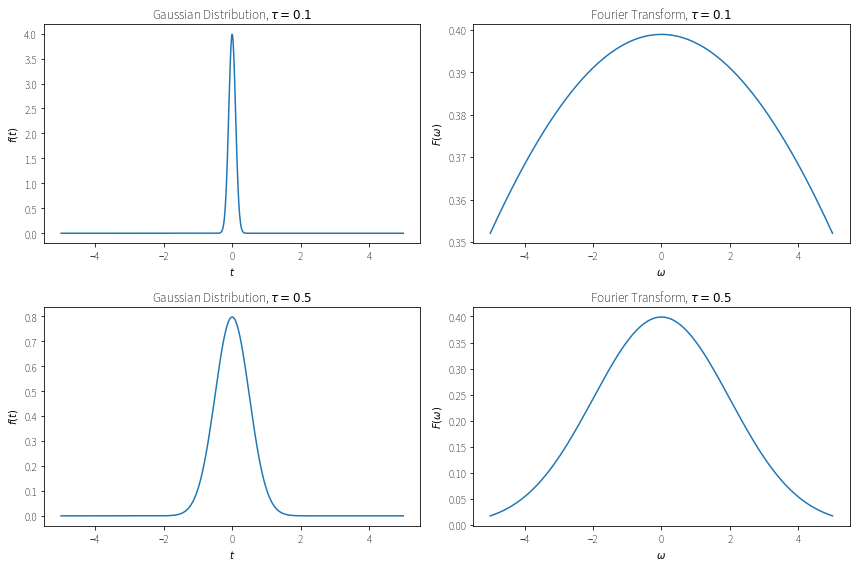

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function for the normalized Gaussian distribution
def gaussian(t, tau):
    return (1 / (tau * np.sqrt(2 * np.pi))) * np.exp(-t**2 / (2 * tau**2))

# Function for the Fourier transform of the Gaussian distribution
def fourier_transform(tau, omega):
    return np.exp(-0.5 * (tau * omega)**2) / np.sqrt(2 * np.pi)

# Values of tau for which to plot the functions
tau_values = [0.1, 0.5, 1, 2]

# Create a range of t and omega values
t_values = np.linspace(-5, 5, 1000)
omega_values = np.linspace(-5, 5, 1000)

# Plot the Gaussian distribution and its Fourier transform for various tau values
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(t_values, gaussian(t_values, tau_values[0]))
plt.title(f'Gaussian Distribution, $\\tau={tau_values[0]}$')
plt.xlabel('$t$')
plt.ylabel('$f(t)$')

plt.subplot(2, 2, 2)
plt.plot(omega_values, fourier_transform(tau_values[0], omega_values))
plt.title(f'Fourier Transform, $\\tau={tau_values[0]}$')
plt.xlabel('$\omega$')
plt.ylabel('$F(\omega)$')

plt.subplot(2, 2, 3)
plt.plot(t_values, gaussian(t_values, tau_values[1]))
plt.title(f'Gaussian Distribution, $\\tau={tau_values[1]}$')
plt.xlabel('$t$')
plt.ylabel('$f(t)$')

plt.subplot(2, 2, 4)
plt.plot(omega_values, fourier_transform(tau_values[1], omega_values))
plt.title(f'Fourier Transform, $\\tau={tau_values[1]}$')
plt.xlabel('$\omega$')
plt.ylabel('$F(\omega)$')

plt.tight_layout()
plt.show()


In [3]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
import numpy as np
from scipy import signal
import math
import pyaudio
import wave
import time
#buf=[]
#

Sample rate: 44100 Hz
Data type: int16


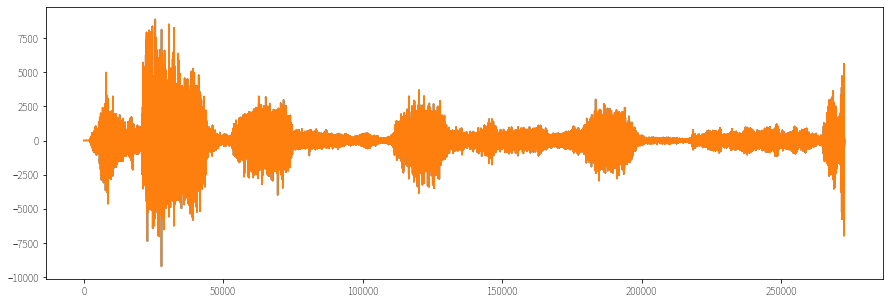

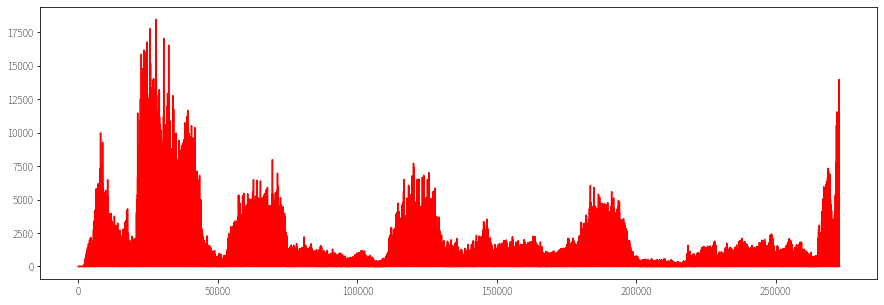

In [4]:
from scipy.io.wavfile import read

# 讀取 WAV 檔案
rate, data = read('/Users/kangyiyun/Desktop/molly/搶玩具.wav')
print("Sample rate: {} Hz".format(rate))
print("Data type: {}".format(data.dtype))

import matplotlib.pyplot as plt

# 繪製前 175000 點資料的波形圖
plt.figure(figsize=(15, 5))
plt.plot(data[:300000])
plt.show()

from scipy.fftpack import fft
dataFFT = fft(data[0:300000])
dataFFTAbs = abs(dataFFT[:])

# 繪製頻譜圖
plt.figure(figsize=(15, 5))
plt.plot(dataFFTAbs, 'r')
plt.show()



Sample rate: 44100 Hz
Data type: int16


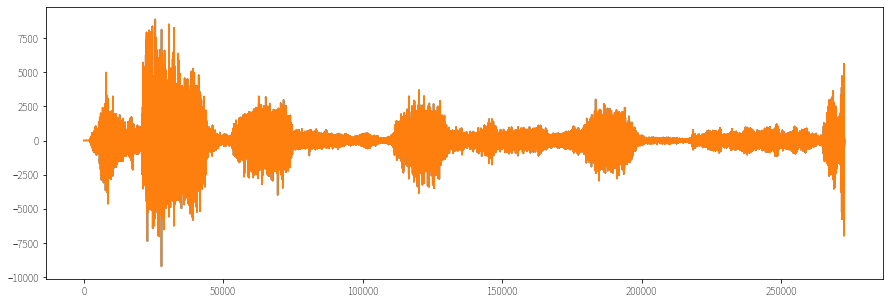

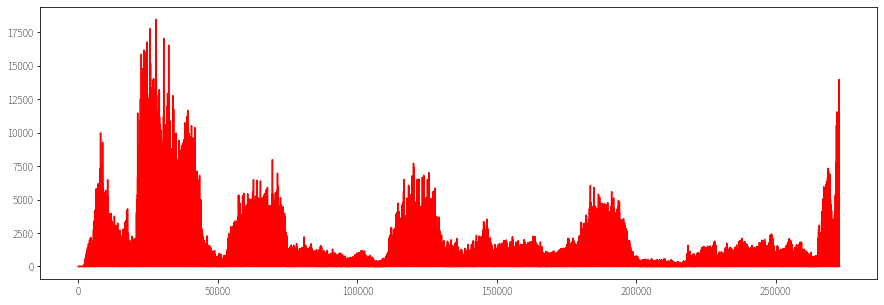

In [5]:
from scipy.io.wavfile import read

# 讀取 WAV 檔案
rate, data = read('/Users/kangyiyun/Desktop/molly/搶玩具.wav')
print("Sample rate: {} Hz".format(rate))
print("Data type: {}".format(data.dtype))

import matplotlib.pyplot as plt

# 繪製前 175000 點資料的波形圖
plt.figure(figsize=(15, 5))
plt.plot(data[:300000])
plt.show()

from scipy.fftpack import fft
dataFFT = fft(data[0:300000])
dataFFTAbs = abs(dataFFT[:])

# 繪製頻譜圖
plt.figure(figsize=(15, 5))
plt.plot(dataFFTAbs, 'r')
plt.show()

'\nplotB = plt.subplot(212)\nplotB.specgram(data, NFFT=175000, Fs=rate, noverlap=100)\nplotB.set_ylabel("Frequency")\nplotB.set_xlabel("Time")\n\nplt.show()\n'

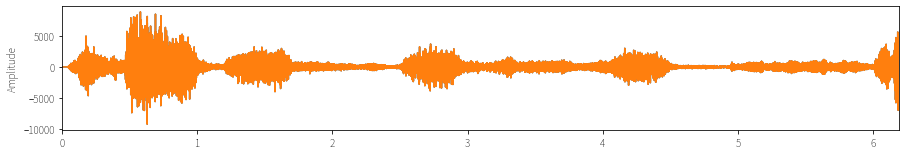

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 產生時間資料
time = np.arange(0, len(data)) / rate

plt.figure(figsize=(15, 5))

# 繪製波形圖
plotA = plt.subplot(211)
plotA.plot(time, data)
plotA.set_ylabel("Amplitude")
plotA.set_xlim(0, len(data) / rate)

# 繪製時頻譜圖
'''
plotB = plt.subplot(212)
plotB.specgram(data, NFFT=175000, Fs=rate, noverlap=100)
plotB.set_ylabel("Frequency")
plotB.set_xlabel("Time")

plt.show()
'''

In [7]:
from pylab import*
from scipy.io import wavfile
sampFreq, snd = wavfile.read('/Users/kangyiyun/Desktop/molly/搶玩具.wav')
snd.dtype

dtype('int16')

In [8]:
snd = snd / (2.**15)
5060.0 / sampFreq
s1 = snd[:, 0]

In [9]:
timeArray = arange(0, 5060.0, 1)   #[0s, 1s], 5060個點
timeArray = timeArray / sampFreq   #[0s, 0.114s]
timeArray = timeArray * 1000       #[0ms, 114ms]
timeArray

array([0.00000000e+00, 2.26757370e-02, 4.53514739e-02, ...,
       1.14671202e+02, 1.14693878e+02, 1.14716553e+02])

ValueError: x and y must have same first dimension, but have shapes (5060,) and (272832,)

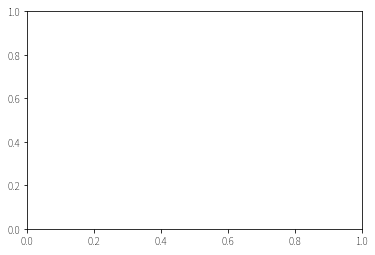

In [10]:
plot(timeArray, s1, color='k')
ylabel('Amplitude')
xlabel('Time (ms)')

In [ ]:
n = len(s1)
p = fft(s1) 
nUniquePts = ceil((n+1)/2.0)
p = p[0:nUniquePts]
p = abs[p]
p = p / float(n)    #除以採樣點數，去除幅度對信號長度或採樣頻率的依賴
p = p**2            #求平方得到能量

#乘2（詳見技術手冊）
#奇nfft排除奈奎斯特點
if n % 2 > 0:       #fft點數爲奇
p[1:len(p)] = p[1:len(p)]*2
else:               #fft點數爲偶
p[1:len(p)-1] = p[1:len(p)-1] * 2

freqArray = arange(0, nUniquePts, 1.0) * (sampFreq / n)
plot(freqArray/1000, 10*log10(p), color='k')
xlabel('Freqency (kHz)')
ylabel('Power (dB)')

In [ ]:
rms_val = sqrt(mean(s1**2))
rms_val

In [ ]:
sqrt(sum(p))